 # Allen Brain Atlas Adult/Prenatal Human Brain

 Author: Moshe Silverstein <br>
 Date: 3-18 <br>
 Adult Source: http://human.brain-map.org/static/download <br>
 Prenatal Source: http://www.brainspan.org/static/download.html

 Reviewer: Charles Dai <br>
 Updated: 6-20

In [2]:
# appyter init
from appyter import magic
magic.init(lambda _=globals: _())

In [3]:
import sys
import os
import zipfile

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import harmonizome.utility_functions as uf
import harmonizome.lookup as lookup

In [4]:
# from clustergrammer_widget import *
# net = Network(clustergrammer_widget)

In [5]:
%load_ext autoreload
%autoreload 2

 ### Python Version

In [6]:
sys.version

'3.8.0 (default, Oct 28 2019, 16:14:01) \n[GCC 8.3.0]'

 # Initialization

### Mapping Meta Functions

In [7]:
def map_adult_rnaseq(matrix, sample_meta, ontology):
    lst = []
    for index in sample_meta.index:
        structure = sample_meta.loc[index, 'ontology_structure_id']
        hemisphere = sample_meta.loc[index, 'hemisphere']
        if type(ontology.loc[structure, 'name']) == str:
            lst.append(str(ontology.loc[structure, 'name']))
        else:
            for struc in ontology.loc[structure, ['name', 'hemisphere']].values:
                if struc[1] == hemisphere:
                    lst.append(str(struc[0]))
    matrix.columns  = lst

def map_adult_ma(matrix, sample_meta, gene_meta):
    matrix.columns  = sample_meta.loc[:, 'structure_name']
    matrix.index = gene_meta['gene_symbol']

def map_prenatal_rnaseq(matrix, sample_meta, gene_meta):
    matrix.columns = sample_meta.loc[matrix.columns, 'structure_name']
    matrix.index = gene_meta['gene_symbol']

### Set Data Set Options

In [18]:
%%appyter code_eval

{% set data_type = ChoiceField(
    name='data_type',
    label='Data Type',
    choices={
        'Adult RNA-Seq': "'RS'", 
        'Adult Microarray': "'MA'",
        'Prenatal RNA-Seq': "'PN-RS'",
    },
    default='Adult Microarray',
    section='data'
) %}

In [19]:
%%appyter code_exec

options = {
    'RS': {
        'output_name': 'aba_ahb_rs',
        'path': 'ABA-AHB-RS',
        'map_func': map_adult_rnaseq,
        'file_names': ['RNAseqCounts.csv', 'SampleAnnot.csv', 'Ontology.csv']
    },
    'MA': {
        'output_name': 'aba_ahb_ma',
        'path': 'ABA-AHB-MA',
        'map_func': map_adult_ma,
        'file_names': ['MicroarrayExpression.csv', 'SampleAnnot.csv', 'Probes.csv']
    },
    'PN-RS': {
        'output_name': 'aba_phb_rs',
        'path': 'ABA-PHB-RS',
        'map_func': map_prenatal_rnaseq,
        'file_names': ['expression_matrix.csv', 'columns_metadata.csv', 'rows_metadata.csv']
    }
}

```python
options = {
    'RS': {
        'output_name': 'aba_ahb_rs',
        'path': 'ABA-AHB-RS',
        'map_func': map_adult_rnaseq,
        'file_names': ['RNAseqCounts.csv', 'SampleAnnot.csv', 'Ontology.csv']
    },
    'MA': {
        'output_name': 'aba_ahb_ma',
        'path': 'ABA-AHB-MA',
        'map_func': map_adult_ma,
        'file_names': ['MicroarrayExpression.csv', 'SampleAnnot.csv', 'Probes.csv']
    },
    'PN-RS': {
        'output_name': 'aba_phb_rs',
        'path': 'ABA-PHB-RS',
        'map_func': map_prenatal_rnaseq,
        'file_names': ['expression_matrix.csv', 'columns_metadata.csv', 'rows_metadata.csv']
    }
}
```

 ### Load Mapping Dictionaries

In [12]:
symbol_lookup, geneid_lookup = lookup.get_lookups()

Gathering sources: 100%|██████████| 3/3 [00:09<00:00,  3.16s/it]


 ### Output Path

In [20]:
%%appyter code_exec

output_name = options[{{data_type}}]['output_name']

path = output_name = options[{{data_type}}]['path']
if not os.path.exists(path):
    os.makedirs(path)

```python
output_name = options['MA']['output_name']
path = output_name = options['MA']['path']
if not os.path.exists(path):
    os.makedirs(path)
```

In [21]:
%%appyter hide_code
{% do SectionField(
    name='data',
    title='Load Data',
    subtitle='Upload Files from the Adult Human Brain or Adult Prenatal Brain Data Sets',
) %}

 # Load Data

In [22]:
%%appyter code_exec

file_list = []
file_list.append({{FileField(constraint='(.*\.zip$)?', name='donor1', label='Dataset 1', 
    default='Input/ABA-AHB-MA/normalized_microarray_donor9861.zip',
    section='data') 
}})
file_list.append({{FileField(constraint='(.*\.zip$)?', name='donor2', label='Dataset 2', 
    default='Input/ABA-AHB-MA/normalized_microarray_donor10021.zip',
    section='data')
}})
file_list.append({{FileField(constraint='(.*\.zip$)?', name='donor3', label='Dataset 3', 
    default='Input/ABA-AHB-MA/normalized_microarray_donor12876.zip',
    section='data')
}})
file_list.append({{FileField(constraint='(.*\.zip$)?', name='donor4', label='Dataset 4', 
    default='Input/ABA-AHB-MA/normalized_microarray_donor14380.zip',
    section='data')
}})
file_list.append({{FileField(constraint='(.*\.zip$)?', name='donor5', label='Dataset 5', 
    default='Input/ABA-AHB-MA/normalized_microarray_donor15496.zip',
    section='data')
}})
file_list.append({{FileField(constraint='(.*\.zip$)?', name='donor6', label='Dataset 6', 
    default='Input/ABA-AHB-MA/normalized_microarray_donor15697.zip',
    section='data')
}})

```python
file_list = []
file_list.append('Input/ABA-AHB-MA/normalized_microarray_donor9861.zip')
file_list.append('Input/ABA-AHB-MA/normalized_microarray_donor10021.zip')
file_list.append('Input/ABA-AHB-MA/normalized_microarray_donor12876.zip')
file_list.append('Input/ABA-AHB-MA/normalized_microarray_donor14380.zip')
file_list.append('Input/ABA-AHB-MA/normalized_microarray_donor15496.zip')
file_list.append('Input/ABA-AHB-MA/normalized_microarray_donor15697.zip')
```

 # Pre-process Data

In [23]:
%%appyter code_exec

mapping_function = options[{{data_type}}]['map_func']
file_names = options[{{data_type}}]['file_names']

```python
mapping_function = options['MA']['map_func']
file_names = options['MA']['file_names']
```

In [24]:
matrices = []

for f in file_list:
    if not f == '':
        print('Loading file ', f, '\t....', sep='', end='')
        with zipfile.ZipFile(f) as myzip:
            with myzip.open(file_names[0]) as matrix_file:
                matrix = pd.read_csv(matrix_file, sep=',', 
                                     header=None, index_col=0)
            with myzip.open(file_names[1]) as meta_file:
                sample_meta = pd.read_csv(meta_file, sep=',')
            with myzip.open(file_names[2]) as probes_file:
                gene_meta = pd.read_csv(probes_file, sep=',', index_col=0)
        mapping_function(matrix, sample_meta, gene_meta)
        matrices.append(matrix)
        print('Done')

Loading file Input/ABA-AHB-MA/normalized_microarray_donor9861.zip	....Done
Loading file Input/ABA-AHB-MA/normalized_microarray_donor10021.zip	....Done
Loading file Input/ABA-AHB-MA/normalized_microarray_donor12876.zip	....Done
Loading file Input/ABA-AHB-MA/normalized_microarray_donor14380.zip	....Done
Loading file Input/ABA-AHB-MA/normalized_microarray_donor15496.zip	....Done
Loading file Input/ABA-AHB-MA/normalized_microarray_donor15697.zip	....Done


In [25]:
matrix = pd.concat(matrices, axis=1)
matrix.head()

structure_name,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"amygdalohippocampal transition zone, left","basal nucleus of meynert, left","lateral nucleus, left","cortico-medial group, left","central nucleus, left","basolateral nucleus, left","globose nucleus, left","emboliform nucleus, left","dentate nucleus, left","dentate nucleus, left"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,4.238947,4.904457,4.538187,4.097456,4.155894,3.827870,4.281830,2.650368,3.819275,4.146520
C9,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.241079,0.856178,0.785617,0.674488,0.702592,0.734009,0.674488,1.043909,0.753249,2.347627
C9,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.997835,0.993764,0.913364,0.728294,0.904583,1.955166,0.719605,1.237933,1.047155,0.760898
MRPL49,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,4.504203,5.368569,4.261653,4.046281,4.580979,4.951714,4.356187,3.688314,5.973862,5.289773
MRPL49,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.643509,6.975886,6.182342,6.497515,6.838988,6.621219,6.222759,6.365968,7.479817,6.949812


In [26]:
matrix.shape

(58692, 3702)

 ## Save Unfiltered Matrix to file

In [15]:
uf.saveData(matrix, path, output_name + '_matrix_unfiltered', compression='npz', dtype=np.float32)

 # Filter Data

 ## Remove Data that is More Than 95% Missing and Impute Missing Data

In [16]:
matrix = uf.removeAndImpute(matrix)
matrix.head()

structure_name,"paracentral lobule, anterior part, right, inferior bank of gyrus","claustrum, right","claustrum, right","dorsal lateral geniculate nucleus, left","CA4 field, right","dentate gyrus, right","dentate nucleus, left","fastigial nucleus, left","emboliform nucleus, right","subiculum, left",...,"amygdalohippocampal transition zone, left","basal nucleus of meynert, left","lateral nucleus, left","cortico-medial group, left","central nucleus, left","basolateral nucleus, left","globose nucleus, left","emboliform nucleus, left","dentate nucleus, left","dentate nucleus, left"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
C8G,3.615792,2.138074,2.480542,2.964972,2.679803,1.856238,2.280435,3.080857,2.628575,2.358912,...,4.238947,4.904457,4.538187,4.097456,4.155894,3.827870,4.281830,2.650368,3.819275,4.146520
C9,1.574380,1.687217,1.975735,2.089475,1.912586,1.601138,1.626724,1.855901,1.858343,1.789023,...,1.241079,0.856178,0.785617,0.674488,0.702592,0.734009,0.674488,1.043909,0.753249,2.347627
C9,1.596431,1.948371,2.191910,2.224042,2.223798,1.557563,1.940634,2.337132,2.253177,1.839538,...,1.997835,0.993764,0.913364,0.728294,0.904583,1.955166,0.719605,1.237933,1.047155,0.760898
MRPL49,4.482883,6.606044,5.261559,4.013277,5.600743,5.624775,4.552105,4.276418,5.675885,5.686694,...,4.504203,5.368569,4.261653,4.046281,4.580979,4.951714,4.356187,3.688314,5.973862,5.289773
MRPL49,6.291312,8.149890,7.948218,6.964453,8.682156,7.753634,7.462767,6.998209,7.565414,7.309235,...,6.643509,6.975886,6.182342,6.497515,6.838988,6.621219,6.222759,6.365968,7.479817,6.949812


In [17]:
matrix.shape

(58692, 3702)

 ## Map Gene Symbols to Up-to-date Approved Gene Symbols

In [18]:
matrix = uf.mapgenesymbols(matrix, symbol_lookup)
matrix.shape

100%|██████████| 58692/58692 [00:00<00:00, 261036.28it/s]


(45605, 3702)

 ## Merge Duplicate Genes By Rows and Duplicate Columns

In [19]:
matrix = uf.merge(matrix, 'row', 'mean')
matrix = uf.merge(matrix, 'column', 'mean')
matrix.shape

(18808, 414)

 ## Log2 Transform

In [20]:
matrix = uf.log2(matrix)
matrix.head()

structure_name,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,2.682822,2.668625,2.431129,2.339325,2.530927,2.438646,2.549506,2.524945,2.621094,2.607653,...,2.522331,2.545428,2.637365,2.616431,2.521137,2.516093,2.599583,2.557936,2.710350,2.751548
A1CF,1.461698,1.631205,1.346108,1.580978,1.502265,1.579932,1.462945,1.652880,1.482998,1.531365,...,1.707081,1.688655,1.578602,2.013194,1.443192,1.621894,1.447454,1.519959,1.560183,1.861887
A2M,3.257641,3.268257,3.155145,3.088072,3.174526,3.189401,3.251576,3.241936,3.105129,3.098728,...,3.309833,3.126602,3.327057,3.297075,3.160200,3.226537,3.449175,3.430095,3.383271,3.349973
A2ML1,2.636332,2.640648,2.654979,2.615413,2.708881,2.700232,2.733796,2.721190,2.560705,2.546052,...,2.678285,2.652767,2.619626,2.709890,2.679622,2.534546,2.648700,2.660721,2.620678,2.685245
A3GALT2,1.363092,1.553775,1.248698,1.338650,1.332853,1.499190,1.420701,1.665701,1.176936,1.159198,...,2.101811,1.513127,2.373523,2.413548,1.162522,1.188432,2.467745,2.394406,2.634019,2.313923


 ## Normalize Matrix (Quantile Normalize the Matrix by Column)

In [21]:
matrix = uf.quantileNormalize(matrix)
matrix.head()

structure_name,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,2.722283,2.709837,2.518944,2.440547,2.573771,2.500953,2.551288,2.517666,2.640065,2.627367,...,2.589617,2.575847,2.622461,2.597485,2.538418,2.514383,2.540814,2.535007,2.622845,2.689939
A1CF,1.457746,1.481551,1.404665,1.466860,1.524451,1.478566,1.496411,1.518550,1.567975,1.622443,...,1.566788,1.770021,1.554668,1.878155,1.483445,1.668054,1.491995,1.464585,1.536461,1.557792
A2M,3.264663,3.279379,3.174074,3.143214,3.175407,3.217106,3.236581,3.235381,3.107205,3.100878,...,3.329139,3.150050,3.327223,3.291514,3.195803,3.258715,3.415342,3.431627,3.317350,3.300986
A2ML1,2.675743,2.681331,2.722204,2.711479,2.742023,2.758401,2.733230,2.720088,2.581639,2.571991,...,2.740396,2.679640,2.603436,2.702889,2.700033,2.534276,2.593523,2.648924,2.526758,2.610748
A3GALT2,1.357337,1.416353,1.305508,1.215484,1.359365,1.377580,1.460719,1.532159,1.271851,1.233588,...,2.140523,1.593942,2.343511,2.359599,1.215484,1.205301,2.398767,2.353212,2.541019,2.151201


 ## Normalize Matrix (Z-Score the Rows)

In [22]:
matrix = uf.zscore(matrix, 'row')
matrix.head()

structure_name,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,1.894916,1.713651,-1.066553,-2.208347,-0.268047,-1.328572,-0.595490,-1.085169,0.697482,0.512549,...,-0.037263,-0.237801,0.441090,0.077338,-0.782938,-1.132977,-0.748032,-0.832606,0.446684,1.423860
A1CF,-0.563220,-0.182519,-1.412122,-0.417461,0.503574,-0.230255,0.055143,0.409201,1.199624,2.070715,...,1.180641,4.430871,0.986822,6.160207,-0.152217,2.800156,-0.015490,-0.453836,0.695646,1.036771
A2M,0.373065,0.544759,-0.683824,-1.043871,-0.668273,-0.181777,0.045436,0.031439,-1.463984,-1.537805,...,1.125310,-0.964116,1.102951,0.686336,-0.430323,0.303670,2.131025,2.321021,0.987767,0.796850
A2ML1,1.099312,1.188422,1.840173,1.669145,2.156205,2.417362,2.015988,1.806430,-0.401259,-0.555093,...,2.130265,1.161459,-0.053686,1.532179,1.486629,-1.156496,-0.211753,0.671665,-1.276378,0.062905
A3GALT2,-2.103039,-1.919671,-2.264075,-2.543788,-2.096737,-2.040142,-1.781822,-1.559851,-2.368652,-2.487539,...,0.330393,-1.367883,0.961096,1.011085,-2.543788,-2.575428,1.132784,0.991238,1.574772,0.363572


 ## Histogram of First Sample

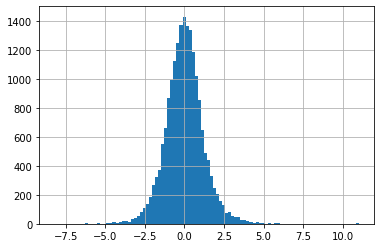

In [23]:
matrix.iloc[:, 0].hist(bins=100)

 ## Histogram of First Gene

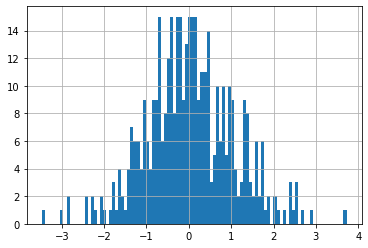

In [24]:
matrix.iloc[0, :].hist(bins=100)

 ## Save Filtered Matrix

In [25]:
uf.saveData(matrix, path, output_name + '_matrix_filtered', 
            ext='tsv', compression='gzip')

 # Analyze Data

 ## Create Gene List

In [26]:
gene_list = uf.createGeneList(matrix, geneid_lookup)
gene_list.head()

100%|██████████| 18808/18808 [00:00<00:00, 177397.34it/s]


,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [27]:
gene_list.shape

(18808, 2)

In [28]:
uf.saveData(gene_list, path, output_name + '_gene_list',
            ext='tsv', compression='gzip', index=False)

 ## Create Attribute List

In [29]:
attribute_list = uf.createAttributeList(matrix)
attribute_list.head()

""
Attributes
"CA1 field, left"
"CA1 field, right"
"CA2 field, left"
"CA2 field, right"
"CA3 field, left"


In [30]:
attribute_list.shape

(414, 0)

In [31]:
uf.saveData(attribute_list, path, output_name + '_attribute_list',
            ext='tsv', compression='gzip')

 ## Create matrix of Standardized values (values between -1, and 1)

In [32]:
standard_matrix = uf.createStandardizedMatrix(matrix)
standard_matrix.head()

100%|██████████| 18808/18808 [00:02<00:00, 7406.59it/s]


Attributes,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0.930901,0.892185,-0.731283,-0.957934,-0.238972,-0.847030,-0.475534,-0.745721,0.500363,0.427877,...,-0.050654,-0.205176,0.365031,0.074952,-0.600970,-0.760206,-0.581668,-0.634728,0.384328,0.824458
A1CF,-0.453823,-0.144793,-0.907314,-0.309027,0.362594,-0.183406,0.043520,0.304568,0.628490,0.831696,...,0.618817,0.972057,0.570465,0.986535,-0.135147,0.875219,-0.009621,-0.333166,0.454465,0.584955
A2M,0.331368,0.389390,-0.566983,-0.731045,-0.562150,-0.224323,0.070379,0.055892,-0.837173,-0.856428,...,0.621481,-0.711686,0.616620,0.447433,-0.446333,0.283025,0.940839,0.974719,0.553797,0.490896
A2ML1,0.625074,0.668678,0.862137,0.837980,0.910561,0.958978,0.886354,0.857307,-0.326920,-0.476539,...,0.905733,0.658939,-0.051655,0.804102,0.779888,-0.722607,-0.172352,0.436564,-0.775673,0.035245
A3GALT2,-0.733641,-0.690186,-0.834914,-0.941005,-0.728801,-0.719117,-0.651576,-0.608164,-0.854194,-0.916902,...,0.304644,-0.564720,0.754342,0.797933,-0.941005,-0.960283,0.836635,0.773700,0.923706,0.338441


In [33]:
uf.saveData(standard_matrix, path, output_name + '_standard_matrix',
            ext='tsv', compression='gzip')

 ## Plot of A Single Celltype, Normalized Value vs. Standardized Value

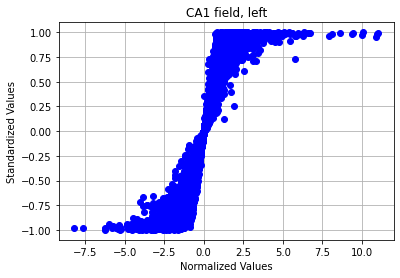

In [34]:
plt.plot(matrix[matrix.columns[0]],
         standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

 ## Create Ternary Matrix

In [35]:
ternary_matrix = uf.createTernaryMatrix(standard_matrix)
ternary_matrix.head()

Attributes,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
gene_symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A2ML1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-1,0,0,0,0


In [36]:
uf.saveData(ternary_matrix, path, output_name + '_ternary_matrix',
            ext='tsv', compression='gzip')

 ## Create Gene and Attribute Set Libraries

In [37]:
uf.createUpGeneSetLib(ternary_matrix, path, output_name + '_gene_up_set')

100%|██████████| 386/386 [00:00<00:00, 5625.34it/s]


In [38]:
uf.createDownGeneSetLib(ternary_matrix, path, output_name + '_gene_down_set')

100%|██████████| 402/402 [00:00<00:00, 5061.14it/s]


In [39]:
uf.createUpAttributeSetLib(ternary_matrix, path, 
                           output_name + '_attribute_up_set')

100%|██████████| 18808/18808 [00:00<00:00, 31999.15it/s]


In [40]:
uf.createDownAttributeSetLib(ternary_matrix, path, 
                             output_name + '_attribute_down_set')

100%|██████████| 18808/18808 [00:00<00:00, 29632.72it/s]


 ## Create Attribute Similarity Matrix

In [41]:
attribute_similarity_matrix = uf.createSimilarityMatrix(matrix.T, 'cosine')
attribute_similarity_matrix.head()

,"CA1 field, left","CA1 field, right","CA2 field, left","CA2 field, right","CA3 field, left","CA3 field, right","CA4 field, left","CA4 field, right","Crus I, left, lateral hemisphere","Crus I, left, paravermis",...,"trochlear nucleus, right","tuberomammillary nucleus, left","ventral tegmental area, left","ventral tegmental area, right","ventromedial hypothalamic nucleus, left","ventromedial hypothalamic nucleus, right","vestibular nuclei, left","vestibular nuclei, right","zona incerta, left","zona incerta, right"
"CA1 field, left",1.000000,0.800108,0.742388,0.647266,0.652327,0.631036,0.603451,0.517441,-0.173291,-0.176655,...,0.024914,0.074716,-0.072062,0.002837,0.127887,0.004104,-0.155313,-0.123741,-0.235356,-0.040268
"CA1 field, right",0.800108,1.000000,0.600226,0.726973,0.554699,0.674227,0.541165,0.630542,-0.163669,-0.165178,...,0.084134,-0.038629,-0.103748,0.133223,0.035651,0.042543,-0.177088,0.002132,-0.196175,0.130758
"CA2 field, left",0.742388,0.600226,1.000000,0.839530,0.866242,0.794518,0.741968,0.613066,-0.113385,-0.116035,...,0.108165,0.124813,-0.088986,-0.028020,0.102177,-0.014399,-0.145593,-0.137434,-0.302680,-0.091776
"CA2 field, right",0.647266,0.726973,0.839530,1.000000,0.773717,0.832581,0.663272,0.691113,-0.129678,-0.130328,...,0.216639,0.044331,-0.101012,0.084884,0.045053,0.108390,-0.205351,0.004534,-0.292006,0.060249
"CA3 field, left",0.652327,0.554699,0.866242,0.773717,1.000000,0.889980,0.891271,0.793471,-0.096503,-0.106129,...,0.108380,0.068694,-0.043850,0.046941,0.124523,-0.008800,-0.096092,-0.048405,-0.269823,-0.019694


In [42]:
uf.saveData(attribute_similarity_matrix, path,
            output_name + '_attribute_similarity_matrix', 
            ext='tsv', compression='gzip')

In [43]:
# net.load_df(attribute_similarity_matrix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
# net.cluster()
# net.widget()

 ## Create Gene Similarity Matrix

In [44]:
gene_similarity_matrix = uf.createSimilarityMatrix(matrix, 'cosine')
gene_similarity_matrix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
A1BG,1.000000,0.178335,-0.106946,0.056553,-0.070320,0.189335,0.074628,0.147808,-0.097163,0.131059,...,0.270277,-0.139797,0.017531,0.126109,0.454166,0.025760,-0.342592,-0.022665,0.145557,0.087999
A1CF,0.178335,1.000000,-0.154614,0.140024,-0.279397,-0.092050,0.108583,0.156868,-0.036240,0.258545,...,-0.072657,-0.138337,0.163637,0.318907,0.377817,0.080519,-0.028900,0.088175,0.262709,-0.185375
A2M,-0.106946,-0.154614,1.000000,0.094213,0.432742,-0.145985,-0.088613,-0.162456,-0.405908,-0.050533,...,0.194415,-0.098881,-0.021343,-0.412387,-0.313740,0.215283,-0.578664,-0.199857,0.011246,0.261771
A2ML1,0.056553,0.140024,0.094213,1.000000,-0.210439,-0.105703,0.048879,-0.230345,-0.398761,0.058327,...,-0.063615,-0.154041,0.267526,0.146917,0.217860,0.054190,-0.185438,-0.152080,0.457782,0.021048
A3GALT2,-0.070320,-0.279397,0.432742,-0.210439,1.000000,0.058644,-0.147598,-0.110881,0.053353,-0.282260,...,0.131465,0.109979,-0.407082,-0.489157,-0.345842,-0.089633,-0.096721,0.120483,-0.087625,0.405175


In [45]:
uf.saveData(gene_similarity_matrix, path, 
            output_name + '_gene_similarity_matrix',
            compression='npz', symmetric=True, dtype=np.float32)

 ## Create Gene-Attribute Edge List

In [46]:
uf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, 
                               path, output_name + '_gene_attribute_edge_list')

The number of statisticaly relevent gene-attribute associations is: 389316


 # Create Downloadable Save File

In [47]:
uf.createArchive(path)

 ### Link to download output files: [click here](./output_archive.zip)